Importing libraries

In [146]:
import tensorflow as tf
import os
import zipfile

Unzip data

In [147]:
zip_file = 'LATICE DATA.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# Check the extracted contents
print(os.listdir())

['.config', 'LATICE DATA', 'LATICE DATA.zip', 'models', 'TPMS-.png', 'drive', 'logs', 'sample_data']


Avoid out of memory error

In [148]:
memory_unit = tf.config.experimental.list_physical_devices('GPU')
for i in memory_unit:
    tf.config.experimental.set_memory_growth(i, True)

tf.config.list_physical_devices('GPU')


[]

Creating a variable to hold our data

In [149]:
import imghdr
import cv2

data_set = 'LATICE DATA'
os.listdir(data_set)

['Data_Lattice_Str', 'Data TPMS']

Looping through the data

In [150]:
os.listdir(os.path.join(data_set, 'Data TPMS'))
os.listdir(os.path.join(data_set, 'Data_Lattice_Str'))

['large14.bmp',
 'large.JPG5.jpg',
 'image2.jpeg',
 'images54.jpg',
 'medium.jpg',
 'large.JPG3.jpg',
 'image6.jpeg',
 'image14.jpeg',
 'images26.jpg',
 'images11.jpg',
 'kratownica-szeC59Bcian-na-czarnym-tle-41142457.jpg',
 'images56.jpg',
 'large7.png',
 'images47.jpg',
 'Testbauteil_Fraunhofer_IPA_6DAF064B-39E4-4512-A821-476C840F84F0.jpg',
 'images16.jpg',
 '97c49fb6286fba43a109f84351edc6dd_display_large_35.webp',
 '1000_F_104987852_7WQw2jcHWOcbVpWtpHGiMnIajL3FvFrs.jpg',
 'SW_lattic.png',
 'image11.jpeg',
 'images66.jpg',
 'bigtl.JPG.jpg',
 'images7.jpg',
 'images24.jpg',
 'large12.png',
 'large3.png',
 'e96c1eeb9036487ef79a57e501c1154b_preview_featured.jpg',
 'Lattice_Cubes_by_Materialise_3-matic.jpg',
 'images14.jpg',
 'large21.png',
 'image5.jpeg',
 'magical-ball-lattice-cube-lost-wax-resin-print-pendant-3d-model-33aaab8867.jpg',
 'cube-molecular-lattice-connection-structure-3d-vector-8564580.jpg',
 'images28.jpg',
 'images62.jpg',
 'iIXnpER.jpg',
 'square.png',
 'lo.jpeg',
 'cub

Cleaning up image extentions

In [151]:
file_ext = ['jpeg','jpg', 'bmp', 'png']

In [152]:
for image_class in os.listdir(data_set):
    for image in os.listdir(os.path.join(data_set, image_class)):
        image_path = os.path.join(data_set, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in file_ext:
                print('not a jpeg, jpg, bmp and png {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Image fault {}'.format(image_path))
            # os.remove(image_path)

not a jpeg, jpg, bmp and png LATICE DATA/Data_Lattice_Str/97c49fb6286fba43a109f84351edc6dd_display_large_35.webp
not a jpeg, jpg, bmp and png LATICE DATA/Data_Lattice_Str/iIXnpER.jpg
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/scell-cube-thumb.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/pbatwingcube.8.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/cy-cube-thumb.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/N14-othercube.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/starfish71fakecubelet.8.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/batwingcube.8.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/octocube.2.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/gyroid-C3.8.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/N26-cube.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/gyroid-frame038.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/di67cubelet.8.gif
not a jpeg, jpg, bmp and png LATICE DATA/Data TPMS/G

Data loading

In [153]:
import numpy as np
from matplotlib import pyplot as plt

#with the following command, no need to build a label and image, it done automatically
data = tf.keras.utils.image_dataset_from_directory('LATICE DATA')

Found 107 files belonging to 2 classes.


Accessing the data

In [154]:
data_access = data.as_numpy_iterator()
data_access

looping

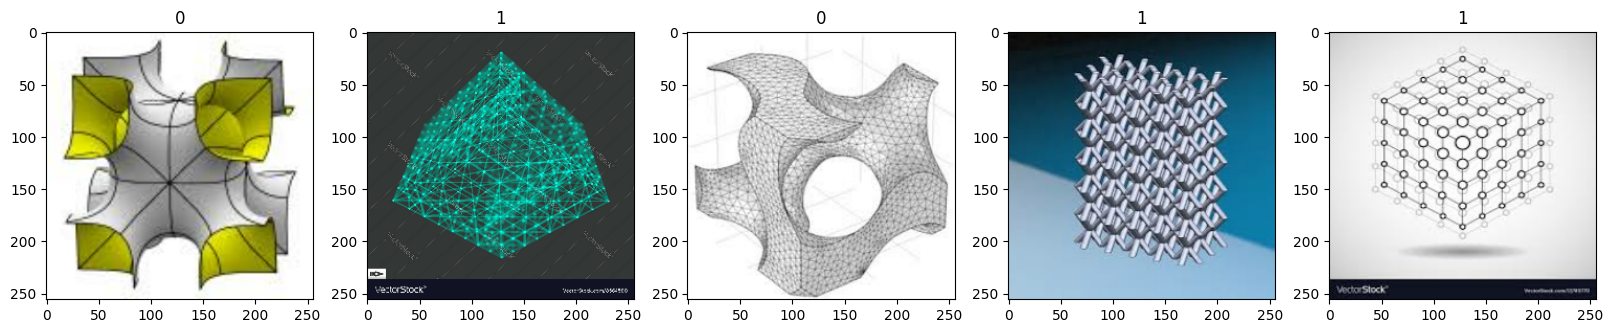

In [145]:
image_and_label = data_access.next()

fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(image_and_label [0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(image_and_label [1][idx])

Preprocessing
#Normalizing/standardizing

In [155]:
#when using tensorflow the minium image is 0 and max is 255. so we can scale our input image
#down by dividing with 255
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()
len(data)

4

partitioning

In [156]:
train_data = int(len(data)*.7)
val_data = int(len(data)*.2)+1
test_data = int(len(data)*.1)+1

Allocating the data sets to each variable

In [157]:
training = data.take(train_data)
vali = data.skip(train_data).take(val_data)
testing = data.skip(train_data+val_data).take(test_data)

Building the model

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

#adding the layers
#convulton and maxpooing layers with input shape
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#adding the layers
#convulton and maxpooing layers
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#adding the layers
#convulton and maxpooing layers
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


#flattening
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 30, 30, 16)       

Model Training

In [135]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model_history = model.fit(training, epochs=20, validation_data=vali, callbacks=[tensorboard_callback])


Epoch 1/20
2/2 [==============================] - 6s 3s/step - loss: 1.5101 - accuracy: 0.4375 - val_loss: 0.4955 - val_accuracy: 0.6562
Epoch 2/20
2/2 [==============================] - 7s 5s/step - loss: 0.6918 - accuracy: 0.5469 - val_loss: 0.7910 - val_accuracy: 0.4375
Epoch 3/20
2/2 [==============================] - 5s 3s/step - loss: 0.6683 - accuracy: 0.5312 - val_loss: 0.5753 - val_accuracy: 0.8438
Epoch 4/20
2/2 [==============================] - 6s 4s/step - loss: 0.5415 - accuracy: 0.8125 - val_loss: 0.4822 - val_accuracy: 0.8438
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 0.4349 - accuracy: 0.9219 - val_loss: 0.4701 - val_accuracy: 0.7188
Epoch 6/20
2/2 [==============================] - 5s 3s/step - loss: 0.3410 - accuracy: 0.8750 - val_loss: 0.2094 - val_accuracy: 0.9375
Epoch 7/20
2/2 [==============================] - 7s 5s/step - loss: 0.3136 - accuracy: 0.8750 - val_loss: 0.3149 - val_accuracy: 0.9062
Epoch 8/20
2/2 [=========================

Model performance plot

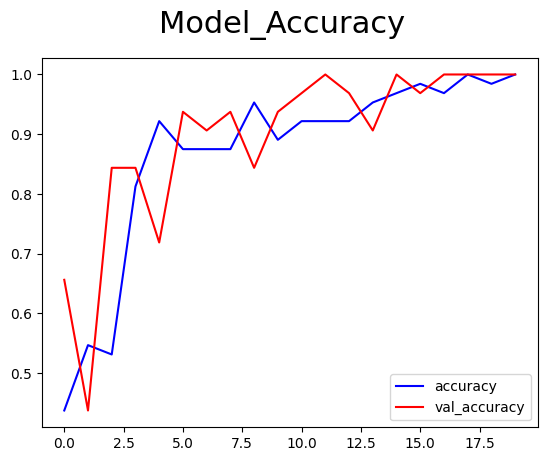

In [136]:
fig = plt.figure()
plt.plot(model_history.history['accuracy'], color='blue', label='accuracy')
plt.plot(model_history.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Model_Accuracy', fontsize=22)
plt.legend(loc="lower right")
plt.show()

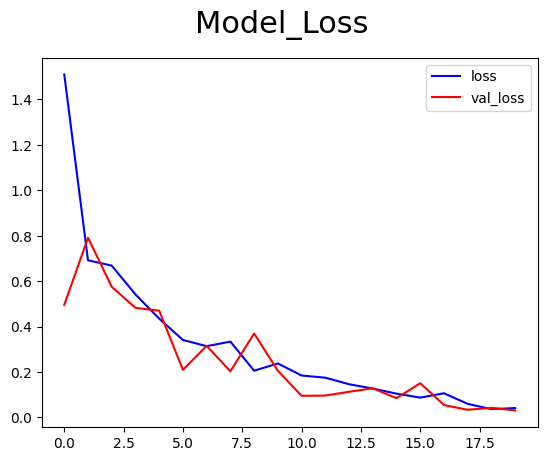

In [137]:
fig = plt.figure()
plt.plot(model_history.history['loss'], color='blue', label='loss')
plt.plot(model_history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Model_Loss', fontsize=22)
plt.legend(loc="upper right")
plt.show()

Performance Evaluation

In [138]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
model_accu = BinaryAccuracy()
model_preci = Precision()
model_rec = Recall()

for image_and_label in testing.as_numpy_iterator():
    X, y = image_and_label
    yhat = model.predict(X)
    model_preci.update_state(y, yhat)
    model_rec.update_state(y, yhat)
    model_accu.update_state(y, yhat)
print(model_preci.result(), model_rec.result(), model_accu.result())

1/1 [==============================] - 0s 248ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test model

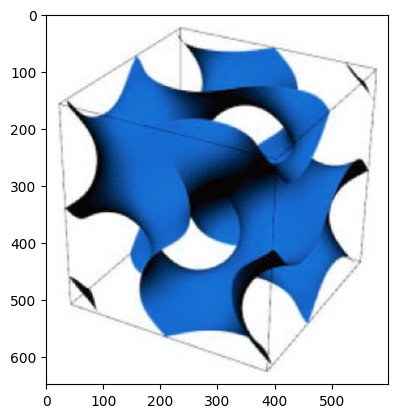

In [139]:
import cv2
img_test = cv2.imread('/content/TPMS-.png')
plt.imshow(img_test)
plt.show()

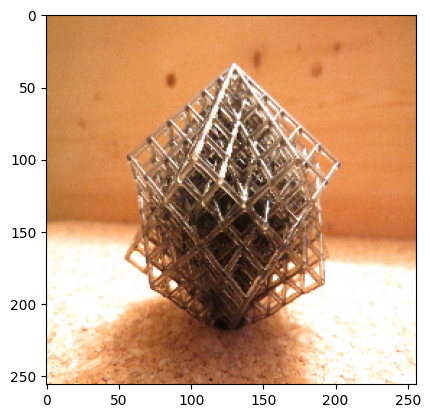

In [140]:
adjus_size = tf.image.resize(img, (256,256))
plt.imshow(adjus_size.numpy().astype(int))
plt.show()

In [141]:
y_pred = model.predict(np.expand_dims(adjus_size/255, 0))
y_pred

1/1 [==============================] - 0s 69ms/step


array([[0.9991214]], dtype=float32)

In [142]:
if y_pred > 0.5:
    print(f'Lattice structure for lower heat transfer')
else:
    print(f'TPMS for optimum heat transfer')

Lattice structure for lower heat transfer


Saving the  model

In [143]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','lattice_structure_tpms.h5'))

In [144]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/your_model_directory/attice_structure_tpms.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
